## Let's import all the needed libs, configurate and load our data

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuration
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load data
df = pd.read_csv('../data/processed/cleaned_dataset.csv')
df = df.drop(columns=['id'])
print("✅ Data loaded successfully")

✅ Data loaded successfully


## Let's look at our data

In [20]:
# Basic dimensions
print(f"Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")
print("\n" + "="*50)

# Head and tail
print("First 5 rows:")
display(df.head())
print("\nLast 5 rows:")
display(df.tail())

# Basic info
print("\nData types and memory usage:")
df.info()

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

Dataset shape: 67680 rows, 2 columns

First 5 rows:


,timestamp,value
0,2024-01-01 00:00:00,18.325
1,2024-01-01 00:00:00,18.325
2,2024-01-01 00:00:00,18.325
3,2024-01-01 00:05:00,21.970
4,2024-01-01 00:05:00,21.970



Last 5 rows:


,timestamp,value
67675,2024-03-31 23:45:00,19.301
67676,2024-03-31 23:50:00,19.341
67677,2024-03-31 23:50:00,19.341
67678,2024-03-31 23:55:00,18.106
67679,2024-03-31 23:55:00,18.106



Data types and memory usage:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67680 entries, 0 to 67679
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  67680 non-null  object 
 1   value      67680 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.0+ MB

Duplicate rows: 40895


## Let's check if there is any missing value

In [21]:
print("Missing values analysis:")
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'missing_count': missing,
    'missing_percent': missing_percent
}).sort_values('missing_count', ascending=False)

display(missing_df[missing_df['missing_count'] > 0])

# Visualize missing values
if missing.sum() > 0:
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
    plt.title('Missing Values Heatmap')
    plt.show()

Missing values analysis:


,missing_count,missing_percent


## Let's make summary of our data

In [22]:
print("Numerical columns summary:")
numeric_cols = df.select_dtypes(include=[np.number]).columns

if len(numeric_cols) > 0:
    display(df[numeric_cols].describe().T)
    
    # Additional stats
    numeric_stats = pd.DataFrame({
        'dtype': df[numeric_cols].dtypes,
        'unique': df[numeric_cols].nunique(),
        'missing': df[numeric_cols].isnull().sum(),
        'skewness': df[numeric_cols].skew(),
        'kurtosis': df[numeric_cols].kurtosis()
    })
    display(numeric_stats)

print("\nCategorical columns summary:")
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    if df[col].nunique() < 10:  # Show all if few unique values
        print(f"  Value counts:")
        display(df[col].value_counts())

Numerical columns summary:


,count,mean,std,min,25%,50%,75%,max
value,67680.000,53.040,42.987,18.001,19.866,21.606,87.985,287.741


,dtype,unique,missing,skewness,kurtosis
value,float64,13321,0,0.853,-0.679



Categorical columns summary:

timestamp:
  Unique values: 26208


## Let's visualize our data

Text(0.5, 1.02, 'Matrix scatter plots')

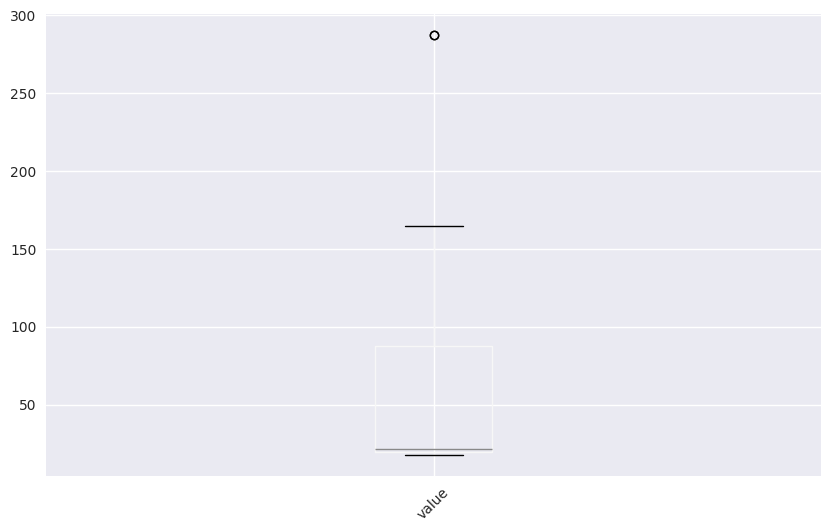

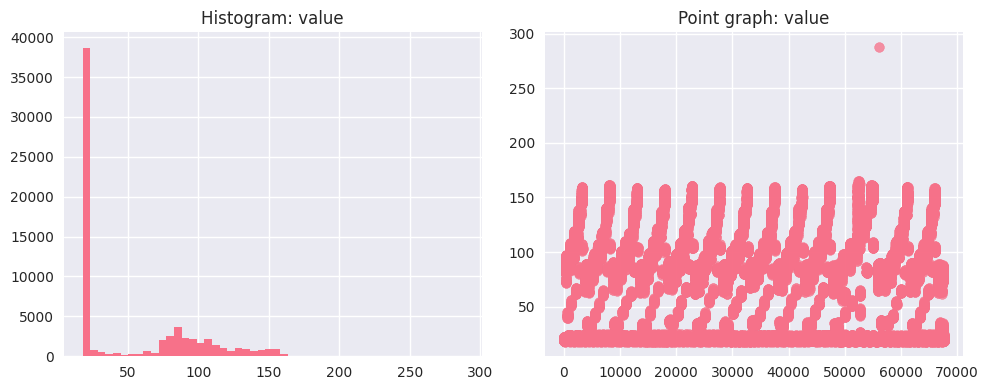

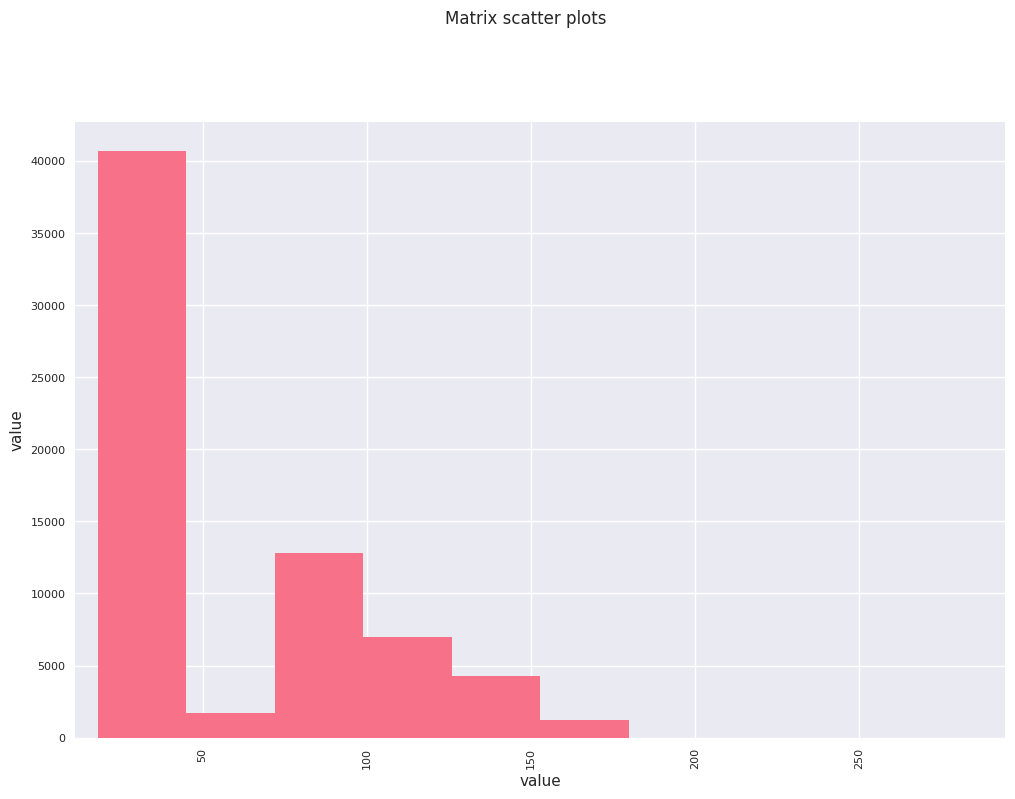

In [ ]:
plt.figure(figsize=(10,6))
df.boxplot()
plt.xticks(rotation=45)
plt.show()
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(bins=50)
    plt.title(f'Histogram: {col}')
    
    plt.subplot(1, 2, 2)
    plt.scatter(range(len(df)), df[col], alpha=0.5)
    plt.title(f'Point graph: {col}')
    plt.tight_layout()
    plt.show()

# 3. Scatter Matrix 
from pandas.plotting import scatter_matrix
scatter_matrix(df[numeric_cols[:5]], figsize=(12, 8), alpha=0.5)
plt.suptitle('Matrix scatter plots', y=1.02)
plt.show()